<a href="https://colab.research.google.com/github/Sathishk2/Computer-Vision/blob/main/VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16

In [ ]:
from tensorflow.keras.applications.vgg16 import decode_predictions
from tensorflow.keras.preprocessing import image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Load image to test

In [ ]:
#img = image.load_img('/content/drive/MyDrive/app/img_ship.jpg',target_size=(224,224))
#img = image.load_img('/content/drive/MyDrive/app/img_F16.jpg',target_size=(224,224))
img = image.load_img('/content/drive/MyDrive/dataset/cats_and_dogs_filtered/validation/dogs/dog.2006.jpg',target_size=(224,224))
#img = image.load_img('/content/drive/MyDrive/app/img_msmouse.jpg',target_size=(224,224))
#img = image.load_img('/content/drive/MyDrive/app/img_mouse.jpg',target_size=(224,224))
#img = image.load_img('/content/drive/MyDrive/app/img_leopard.jpg',target_size=(224,224))


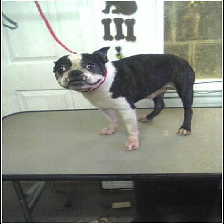

In [ ]:
img

#Convert image to numpy array

In [ ]:
x = image.img_to_array(img)
x.shape

(224, 224, 3)

In [ ]:
x = x.reshape(1,224,224,3)
x.shape

(1, 224, 224, 3)

#Load pre-trained VGG16 from tensorflow

In [ ]:
model=VGG16()

553467096/553467096 [==============================] - 3s 0us/step


In [ ]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

#Predict using loaded model

In [ ]:
predictions = model.predict(x)

1/1 [==============================] - 3s 3s/step


In [ ]:
print(type(predictions))
print(predictions.shape) #np array of 1 image only, together with its 1000 probabilities


<class 'numpy.ndarray'>
(1, 1000)


In [ ]:
classes = decode_predictions(predictions,top=5) # comes from tensorflow.keras.applications.vgg16
                                                # it takes top 5 probabilities

35363/35363 [==============================] - 0s 0us/step


In [ ]:
print(classes)

[[('n02096585', 'Boston_bull', 0.88601476), ('n02108915', 'French_bulldog', 0.049124394), ('n02085620', 'Chihuahua', 0.02275931), ('n02093256', 'Staffordshire_bullterrier', 0.01399778), ('n02087046', 'toy_terrier', 0.0072051864)]]


In [ ]:
for p in range(5):
  print("%20s: %.4f" % (classes[0][p][1], classes[0][p][2]))

         Boston_bull: 0.8860
      French_bulldog: 0.0491
           Chihuahua: 0.0228
Staffordshire_bullterrier: 0.0140
         toy_terrier: 0.0072


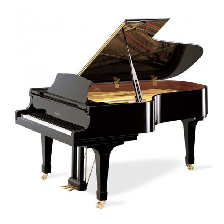

In [ ]:
img = image.load_img('/content/drive/MyDrive/app/img_piano.jpg',target_size=(224,224))
img

In [ ]:
x = image.img_to_array(img) #convert img to numpy array
x = x.reshape(1,224,224,3) #reshape to 1 of 244x244x3, because we only have 1 pic to predict
predictions = model.predict(x)
classes = decode_predictions(predictions,top=5)
print(classes)

1/1 [==============================] - 0s 19ms/step
[[('n03452741', 'grand_piano', 0.99996006), ('n04515003', 'upright', 3.9908722e-05), ('n03201208', 'dining_table', 2.3682833e-08), ('n03982430', 'pool_table', 1.04601385e-08), ('n03903868', 'pedestal', 4.192485e-09)]]


In [ ]:
for p in range(5):
  print("%20s: %.4f" % (classes[0][p][1], classes[0][p][2]))

         grand_piano: 1.0000
             upright: 0.0000
        dining_table: 0.0000
          pool_table: 0.0000
            pedestal: 0.0000
